In [1]:
# pip install "gensim==3.8.1"
# !pip install texthero
# import texthero as hero

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

import re

EDA - Exploratory Data Anaysis

In [4]:
df = pd.read_parquet('C:/Users/Olimpio.Dasilva/Desktop/MACHINE LEARNING/DATA/reporting_ncr_all_transactions_202302131044.parquet')
pd.set_option('display.max_colwidth', None)
df.head(5)

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name
0,DI1004,Adb7cee870873375e9b71f97b49bb47f3,T8c3444845ea837d98f6492fbfeb996b1,300.0,USD,External Withdrawal TJMAXX,MASTERCAR NEEDHAM BANK BP BILL PAYMT,MT,2023-02-08,12897.0,TJ MAXX,Unknow Payment Agent,NaN,2023-02-13,FTS_CSLK_TRANSAC_20230212_100011.csv,Needham Bank
1,DI1004,A0d0f7d433a6f3cf4815fc5f7f77bbf73,Td0c9a05199c034f282105c258edf4c90,42.5,USD,POS Withdrawal (FIP) SUNOCO,*63 SUNOCO *63 FRAMINGHAM MA(8631),None,2023-02-08,12696.0,SUNOCO,Unknow Payment Agent,NaN,2023-02-13,FTS_CSLK_TRANSAC_20230212_100011.csv,Needham Bank
2,DI1004,Ac9fb869c66b83cb7a6f0d84e5f37d60a,Tf9ce6b86a4e1379eb600c9af4c1ae90e,250.0,USD,External Withdrawal BARCLAYCARD,US CREDITCARD,None,2023-02-07,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2023-02-13,FTS_CSLK_TRANSAC_20230212_100011.csv,Needham Bank
3,DI1004,Ade85fffa5da73362bd6b0522721820a3,T4f1445aa5fd536f09d13bd6918c057fb,42.5,USD,ATM Withdrawal (FIP) SUNSHINE,LLC-60 464 MAIN ST WEST SPRINGFI MA(5681),None,2023-02-08,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2023-02-13,FTS_CSLK_TRANSAC_20230212_100011.csv,Needham Bank
4,DI1004,A1f3390a72bf035a48a21fce7d72df58a,T7be6870fc08e30c48fd78836885adf12,114.5,USD,POS Withdrawal (FIP) NNT,DESTINATION 735 PROVIDENCE HWY DEDHAM MA(7169),None,2023-02-11,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2023-02-13,FTS_CSLK_TRANSAC_20230212_100011.csv,Needham Bank


In [5]:
# #df.loc[df['payment_agent']!='Unknow Payment Agent']
# df.loc[(df['payment_agent'] != 'Unknow Payment Agent') & (df['merchant_name'] != 'Unknow Merchant')]

In [6]:
df.shape

(2280287, 16)

In [7]:
df.isnull().sum()
#df.dropna(inplace=True)

fi_id                          0
account_id                     0
transaction_id                 0
amount                         1
currency                       1
txn_desc1                    199
txn_desc2                 166629
region                   1941391
transaction_timestamp          2
merchant_id              1144835
merchant_name                  1
payment_agent                  1
payment_agent_id         2076646
extract_date                   1
filename                       1
name                           1
dtype: int64

In [8]:
df.nunique()

fi_id                        207
account_id                159294
transaction_id           2180340
amount                     75569
currency                       1
txn_desc1                 298314
txn_desc2                1292160
region                        50
transaction_timestamp        464
merchant_id                 1791
merchant_name               1794
payment_agent                 16
payment_agent_id              15
extract_date                   8
filename                       9
name                         207
dtype: int64

In [9]:
# feature scaling and label encoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
df_cp = df[['amount','txn_desc1','txn_desc2','region','payment_agent','merchant_name']].copy(deep=True)
df_cp = df_cp.apply(LabelEncoder().fit_transform)
df_cp.head()


,amount,txn_desc1,txn_desc2,region,payment_agent,merchant_name
0,29682,104027,592925,25,14,1591
1,4249,184107,20644,50,14,1500
2,24930,101414,1096902,50,14,1668
3,4249,23649,572056,50,14,1668
4,11449,183611,389034,50,14,1668


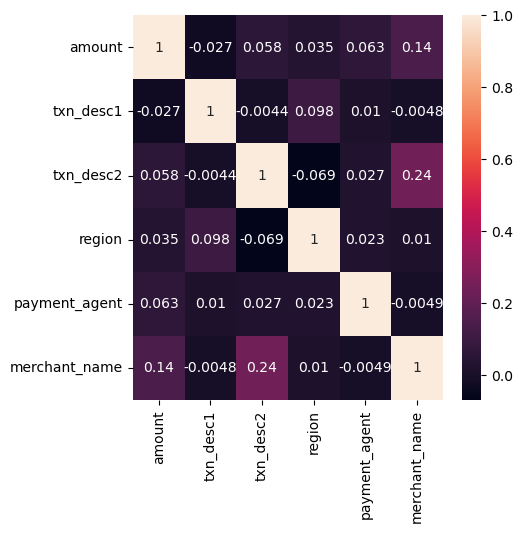

In [10]:
plt.subplots(figsize=(5, 5))
sns.heatmap(df_cp.corr(), annot=True);

Unknown Merchant Names

In [11]:
df_unknown_merchs = df.copy(deep=True)
df_unknown_merchs = df_unknown_merchs[df["merchant_name"].str.contains("Unknow Merchant") == True]
df_unknown_merchs.shape

(1146663, 16)

Known Merchant Names

In [27]:
# Selecting only known merchants names from the original dataset
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
df_known_merchs = df_known_merchs[df["merchant_name"].str.contains("Unknow Merchant") == False]
df_known_merchs.shape

(1133623, 5)

In [29]:
# Total number of known merchants
len(df_known_merchs.merchant_name.unique())

1793

In [30]:
# Total number of occurences per merchant name 
(df_known_merchs.merchant_name).value_counts()

AMAZON.COM            96572
WALMART               78246
MCDONALD'S            37171
APPLE STORE           34993
TARGET                25209
                      ...  
SERAPHINE                 1
CASA.COM                  1
HABIT BURGER GRILL        1
CHARLOTTE TILBURY         1
REJUVENATION              1
Name: merchant_name, Length: 1793, dtype: int64

In [31]:
# Concatenating transaction descriptions columns
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" %%%%% "+ df_known_merchs['txn_desc2'].astype(str)

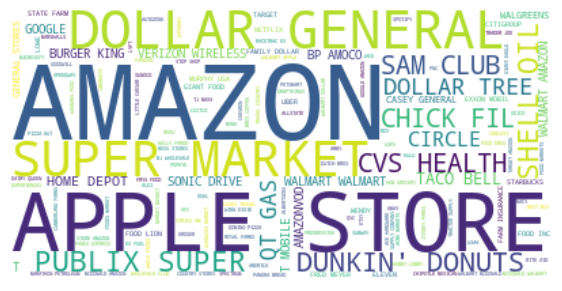

In [32]:
# Copy of the afs merchant names column
df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name']

# Word cloud for more frequent merchant names
text = " ".join(i for i in df_known_merchs.AFS_MECHANT_NAMES)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(7,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
def check_names(merchant, t_details):
    
    # Variations for merchant name column
    merchant_1 = merchant
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/]', ' ', merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split()
    
    # Variations for transaction details column
    t_details_1 = t_details
    t_details_2 = t_details.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + details_lis + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split()
    
    # Conditions to check if words are in transaction strings
    if (merchant in t_details_3 or t_details_3 in merchant or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or 
        (merchant_3 in t_details_3 or t_details_3 in merchant_3) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (merchant_1 in t_details_3 or t_details_1 in merchant_4) or
        (merchant_1 in details_lis_1 or merchant_4 in details_lis)or
        (any(item in merch_list for item in details_lis_1)) or
        (merchant_1[:3] in t_details_1)):
        return True
    else:
        return False
    

In [34]:
# # Funciton to detect similarity between 2 results
# def similarity(a, b):
#     s_score = fuzz.ratio(a, b)
#     print(s_score)
#     return s_score

In [35]:
# # Similarity colunm representation - TO CHECK
# df_known_merchs['SIMILARITY'] = df_known_merchs.apply(lambda x: fuzz.ratio(x['AFS_MECHANT_NAMES'], x['TRANSACTION_DETAILS']), axis=1)

In [36]:
# Checking if merchant names are mentioned in the transaction description
df_known_merchs['CHECK'] = df_known_merchs.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.TRANSACTION_DETAILS), axis=1)
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,CHECK
0,T8c3444845ea837d98f6492fbfeb996b1,External Withdrawal TJMAXX,MASTERCAR NEEDHAM BANK BP BILL PAYMT,Unknow Payment Agent,TJ MAXX,External Withdrawal TJMAXX %%%%% MASTERCAR NEEDHAM BANK BP BILL PAYMT,TJ MAXX,True
1,Td0c9a05199c034f282105c258edf4c90,POS Withdrawal (FIP) SUNOCO,*63 SUNOCO *63 FRAMINGHAM MA(8631),Unknow Payment Agent,SUNOCO,POS Withdrawal (FIP) SUNOCO %%%%% *63 SUNOCO *63 FRAMINGHAM MA(8631),SUNOCO,True
5,T644d8104fbda356aaa98203bb5723f4e,POS Withdrawal (FIP) KOHLS 0575,1 WORCESTER RD FRAMINGHAM MA(8806),Unknow Payment Agent,KOHL'S,POS Withdrawal (FIP) KOHLS 0575 %%%%% 1 WORCESTER RD FRAMINGHAM MA(8806),KOHL'S,True
7,Tce633b3d9de130218e493c10b9fbe09a,POS Withdrawal (FIS),AMAZON.COM*HE3H AMAZON.COM SEATTLE WA(6966),Unknow Payment Agent,AMAZON.COM,POS Withdrawal (FIS) %%%%% AMAZON.COM*HE3H AMAZON.COM SEATTLE WA(6966),AMAZON.COM,True
12,T1704c488eec6363fa58d5b2b3a770c7b,POS Withdrawal (FIS),AMAZON.COM*HR0D AMAZON.COM SEATTLE WA(6966),Unknow Payment Agent,AMAZON.COM,POS Withdrawal (FIS) %%%%% AMAZON.COM*HR0D AMAZON.COM SEATTLE WA(6966),AMAZON.COM,True


In [37]:
# Merchant name in the transaction description
(df_known_merchs['CHECK'] == True).sum() 

1118737

In [53]:
df_known_merchs_cp = df_known_merchs.copy(deep=True)
df_known_merchs_cp['CHECK']= df_known_merchs_cp['CHECK'].replace(False,0)
df_known_merchs_cp['CHECK'] = df_known_merchs_cp['CHECK'].replace(True,1)
df_known_merchs_cp.head()


,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,CHECK
0,T8c3444845ea837d98f6492fbfeb996b1,External Withdrawal TJMAXX,MASTERCAR NEEDHAM BANK BP BILL PAYMT,Unknow Payment Agent,TJ MAXX,External Withdrawal TJMAXX %%%%% MASTERCAR NEEDHAM BANK BP BILL PAYMT,TJ MAXX,1
1,Td0c9a05199c034f282105c258edf4c90,POS Withdrawal (FIP) SUNOCO,*63 SUNOCO *63 FRAMINGHAM MA(8631),Unknow Payment Agent,SUNOCO,POS Withdrawal (FIP) SUNOCO %%%%% *63 SUNOCO *63 FRAMINGHAM MA(8631),SUNOCO,1
5,T644d8104fbda356aaa98203bb5723f4e,POS Withdrawal (FIP) KOHLS 0575,1 WORCESTER RD FRAMINGHAM MA(8806),Unknow Payment Agent,KOHL'S,POS Withdrawal (FIP) KOHLS 0575 %%%%% 1 WORCESTER RD FRAMINGHAM MA(8806),KOHL'S,1
7,Tce633b3d9de130218e493c10b9fbe09a,POS Withdrawal (FIS),AMAZON.COM*HE3H AMAZON.COM SEATTLE WA(6966),Unknow Payment Agent,AMAZON.COM,POS Withdrawal (FIS) %%%%% AMAZON.COM*HE3H AMAZON.COM SEATTLE WA(6966),AMAZON.COM,1
12,T1704c488eec6363fa58d5b2b3a770c7b,POS Withdrawal (FIS),AMAZON.COM*HR0D AMAZON.COM SEATTLE WA(6966),Unknow Payment Agent,AMAZON.COM,POS Withdrawal (FIS) %%%%% AMAZON.COM*HR0D AMAZON.COM SEATTLE WA(6966),AMAZON.COM,1


In [1]:
# Word cloud for more frequent merchant names WHEN merchant name is in transaction description
text = " ".join(i for i in dfx.AFS_MECHANT_NAMES)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(7,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'dfx' is not defined

In [ ]:
# Total number of occurences per merchant name 
(dfx.AFS_MECHANT_NAMES).value_counts()

In [ ]:
# Merchant name not in the transaction description
(df_known_merchs['CHECK'] == False).sum() 

In [ ]:
dfx2 = pd.DataFrame()
dfx2 = df_known_merchs.loc[df_known_merchs['CHECK'] == False]

In [ ]:
len(dfx2)

In [ ]:
# Word cloud for more frequent merchant names WHEN merchant name is in transaction description
text = " ".join(i for i in dfx2.AFS_MECHANT_NAMES)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(7,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Total number of occurences per merchant name WHEN merchant name is not in transation details
(dfx2.AFS_MECHANT_NAMES).value_counts()

In [ ]:
# Number of transactions with known merchant names
len(df_known_merchs) 

In [ ]:
# Merchant names not mentioned in transaction description
df_known_merchs.loc[df_known_merchs['CHECK']==False] 


In [ ]:
# Known payment agent names
df_known_merchs.loc[df_known_merchs['payment_agent'] != 'Unknow Payment Agent'] 

In [ ]:
# Number of total occurences per payment agents
df_known_payment_agents = df_known_merchs.loc[df_known_merchs['payment_agent'] != 'Unknow Payment Agent']
(df_known_payment_agents.payment_agent).value_counts()

In [ ]:
# Total number of payment agents
len(df_known_payment_agents.payment_agent.unique())

In [ ]:
# Number of transactions with known payment agents
len(df_known_payment_agents)

In [ ]:
def compare_occurences(agent, merchant):
    # Conditions to check if words are in transaction strings
    if (merchant in agent or agent in merchant or
        (any(item in merchant for item in agent)) or
        (merchant[:3] in agent)):
        return True
    else:
        return False

In [ ]:
# Copy of the afs merchant names column
df_known_merchs['AFS_PAYMENT_AGENTS'] = df_known_merchs['payment_agent']

In [ ]:
# Checking if merchant names and payment agents are same
df_known_merchs['CHECK_MERCH_AGTS'] = df_known_merchs.apply(lambda x: check_names(x.AFS_PAYMENT_AGENTS, x.AFS_MECHANT_NAMES), axis=1)
df_known_merchs.head(15)

In [ ]:
# Same merchant names and payment agents
dttt = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_AGTS']==True] 

In [ ]:
dttt = df_known_merchs[df_known_merchs["payment_agent"].str.contains("Unknow Payment Agent") == False]
dttt

In [ ]:
check_names('DOLLAR GENERAL', 'DOORDASH')

In [ ]:
len(dttt)

In [ ]:
remove = string.punctuation + string.whitespace
remove

In [ ]:
s1 = 'hello ! how are you going? '
s1=s1.translate(remove)
s1